In [3]:
import numpy as np
import lusee_sky
import matplotlib.pyplot as plt
import scipy
from scipy.ndimage import gaussian_filter as gfilt


In [4]:
freqt=np.arange(1,45,0.25)
gsignal=lusee_sky.get_signal(freqt)

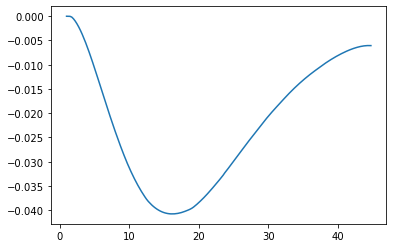

In [5]:
plt.plot(freqt,gsignal)

In [6]:
data=np.load('waterfalls/wfall_1.0_50.0_0.25_3.0_30.0.npz',allow_pickle=True)
wf=data['wfall']
freq=data['freq']

## for this, let's merge them. In other words, 11 nights worth of observations in one go
wf=np.vstack(wf)
maxfreq=30
freq = np.arange(4,maxfreq,0.25)
wf = wf[:,:len(freq)]
do_filter=False
if do_filter:
    mwf = wf.mean(axis=0)
    tmp = wf/mwf[None,:]
    tmp = gfilt(tmp,[4,32])
    wf = tmp*mwf[None,:]
wf.shape

(16960, 104)

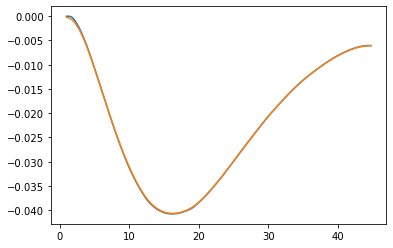

In [34]:
plt.plot(freqt,gsignal)
plt.plot(freqt,gfilt(gsignal,3))

In [8]:
test= wf[1400,:]

In [45]:
alpha=np.log(test[-1]/test[0])/np.log(freq[-1]/freq[0])*0.7
mod = test/freq**alpha
interp = scipy.interpolate.interp1d(freq[::4],mod[::4],kind='cubic',fill_value='extrapolate')(freq)
fit2 = freq**alpha*interp
fit3 = gfilt(mod,3)

(-0.05, 0.05)

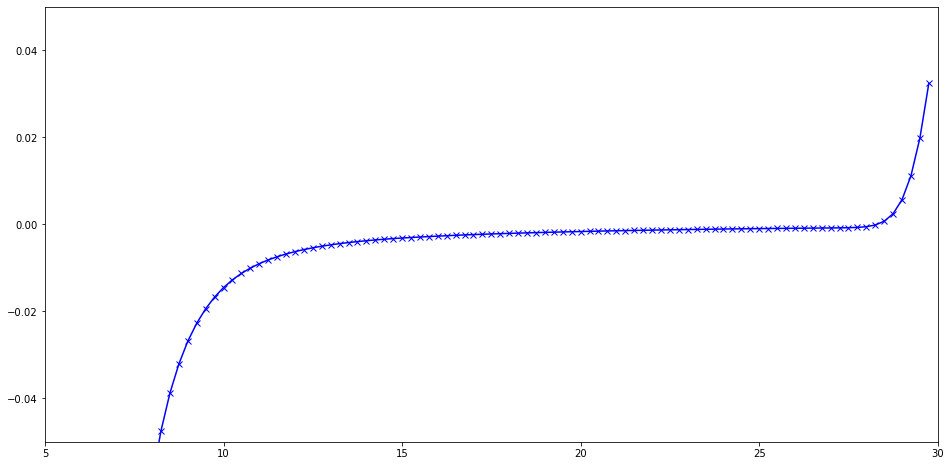

In [46]:
plt.figure(figsize=(16,8))
plt.plot(freq,mod/tfit3-1,'bx-')
#plt.plot(freq,mod/interp-1,'rx-')
plt.xlim(5,30)
plt.ylim(-0.05,0.05)

(-100000.0, 100000.0)

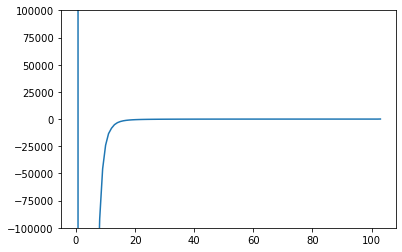

In [11]:
plt.plot(test-freq**alpha*fit3)
plt.ylim(-100000,100000)